# Разведочный анализ данных (EDA) по поездкам на самокатах Т-Банка
Проект по анализу данных, включающий очистку, визуализацию и выработку продуктовых гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля для графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'

try:
    df = pd.read_csv('kicksharing.csv')
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл 'kicksharing.csv' не найден. Пожалуйста, убедитесь, что он находится в той же директории.")
    exit()

Данные успешно загружены.


## Очистка и подготовка данных
Мы преобразуем столбцы с датами и удаляем некорректные записи, чтобы обеспечить точность анализа.

In [2]:
print("\nИнформация о данных:")
df.info()

# Преобразование столбцов с датами в формат datetime
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])

# Удаление некорректных записей с нулевой или отрицательной продолжительностью поездки
df = df[df['distance_km'] > 0]
df = df[df['nominal_price_rub_amt'] > 0]

# Создание новых признаков для анализа
df['trip_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
df['day_of_week'] = df['book_start_dttm'].dt.day_name()
df['hour_of_day'] = df['book_start_dttm'].dt.hour
df['month'] = df['book_start_dttm'].dt.month


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-n

# Код для графика "Распределение поездок по дням недели"


Распределение поездок по дням недели:
day_of_week
Monday       53303
Tuesday      55265
Wednesday    57032
Thursday     57614
Friday       60367
Saturday     52507
Sunday       46381
Name: count, dtype: int64


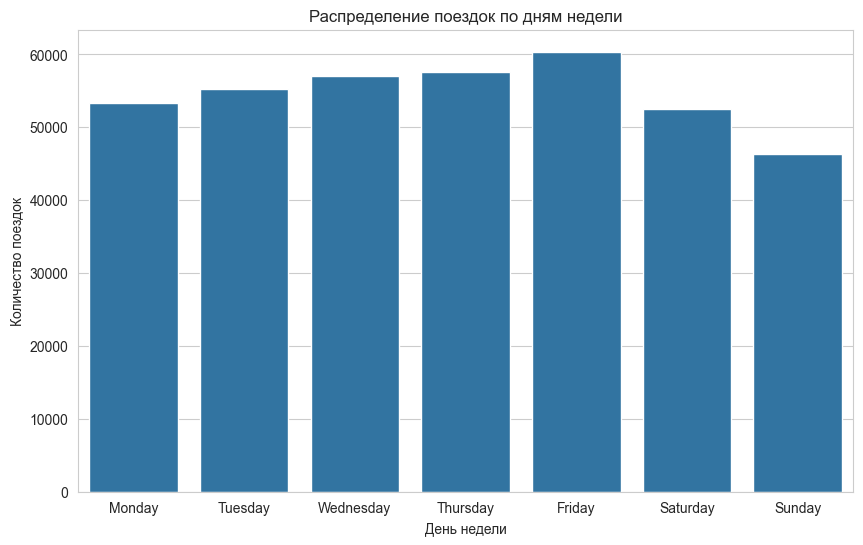

In [3]:
# Распределение поездок по дням недели
print("\nРаспределение поездок по дням недели:")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['day_of_week'].value_counts().reindex(weekday_order)
print(weekday_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Распределение поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

Вывод: Наибольшее количество поездок на самокатах приходится на будние дни, особенно в пятницу. Это говорит о том, что сервис активно используется для ежедневных поездок на работу, а не только для досуга и развлечений.

# Код для графика "Распределение поездок по часам суток"


Распределение поездок по часам суток:
hour_of_day
0      2499
1      3147
2      4649
3      9263
4     16210
5     23311
6     19387
7     15555
8     15238
9     16829
10    18338
11    18998
12    20332
13    22946
14    27125
15    31331
16    29537
17    23824
18    19846
19    16160
20    11830
21     8219
22     4793
23     3102
Name: count, dtype: int64


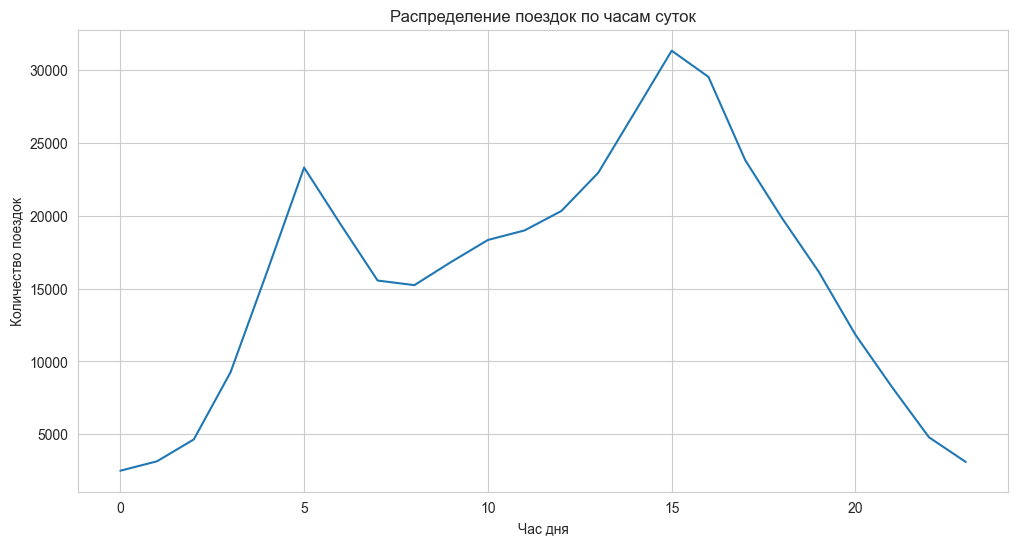

In [4]:
print("\nРаспределение поездок по часам суток:")
hourly_counts = df['hour_of_day'].value_counts().sort_index()
print(hourly_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Распределение поездок по часам суток')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.show()

Вывод: На графике заметны два выраженных часа пик: утром (около 5-6 утра) и вечером (около 15-16 часов). Это типичная картина для транспортного сервиса, что указывает на использование самокатов для поездок на работу и учебу, а также обратно.

# Код для графика "Анализ по полу"


Анализ по полу:
gender_cd
M      323481
F       56195
NaN      2793
Name: count, dtype: int64
gender_cd
F    13.352061
M    11.513474
Name: trip_duration_min, dtype: float64
gender_cd
F    143.823063
M    128.766437
Name: nominal_price_rub_amt, dtype: float64


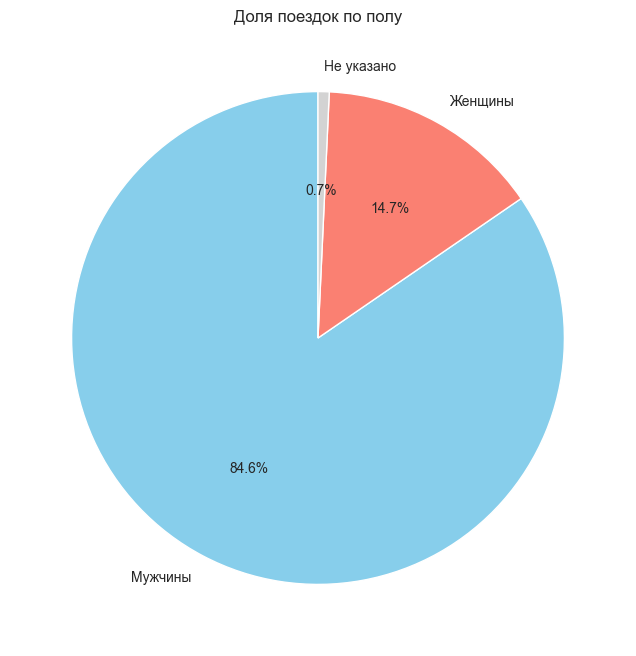

In [5]:
print("\nАнализ по полу:")
gender_counts = df['gender_cd'].value_counts(dropna=False)
print(gender_counts)
print(df.groupby('gender_cd')['trip_duration_min'].mean())
print(df.groupby('gender_cd')['nominal_price_rub_amt'].mean())

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Мужчины', 'Женщины', 'Не указано'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgray'])
plt.title('Доля поездок по полу')
plt.show()

Вывод: Мужчины являются основной аудиторией сервиса, совершая более 80% всех поездок. Этот инсайт может быть полезен для разработки таргетированных маркетинговых кампаний.

# Код для графика "Анализ по возрасту"


Анализ по возрасту:
count    382469.000000
mean         31.558741
std           9.420530
min          12.000000
25%          24.000000
50%          31.000000
75%          37.000000
max          94.000000
Name: age, dtype: float64


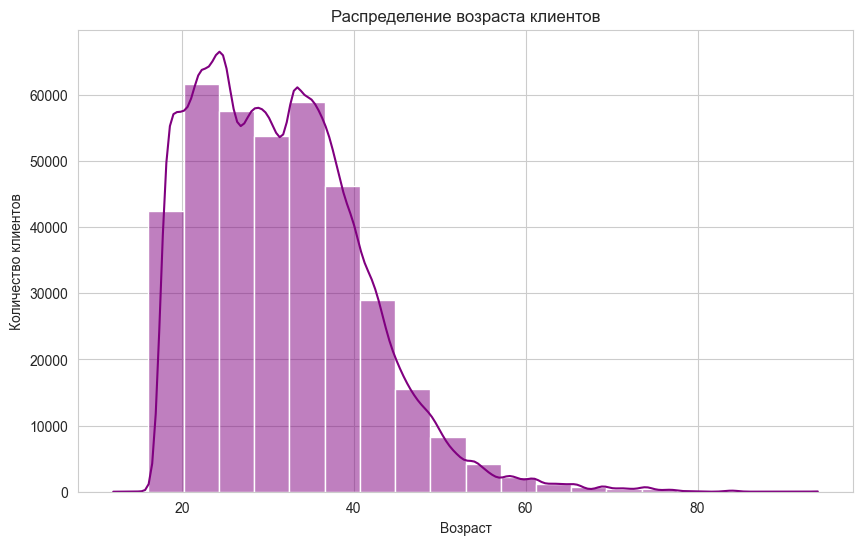

In [6]:
print("\nАнализ по возрасту:")
print(df['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='purple')
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Вывод: Основная масса клиентов — это люди в возрасте от 20 до 35 лет. Это наиболее активная, молодая и технологически подкованная аудитория, что соответствует типичному портрету пользователя сервисов кикшеринга.

# Код для графика "Зависимость стоимости от продолжительности"


Корреляция между продолжительностью и стоимостью:
                       trip_duration_min  nominal_price_rub_amt
trip_duration_min               1.000000               0.955473
nominal_price_rub_amt           0.955473               1.000000


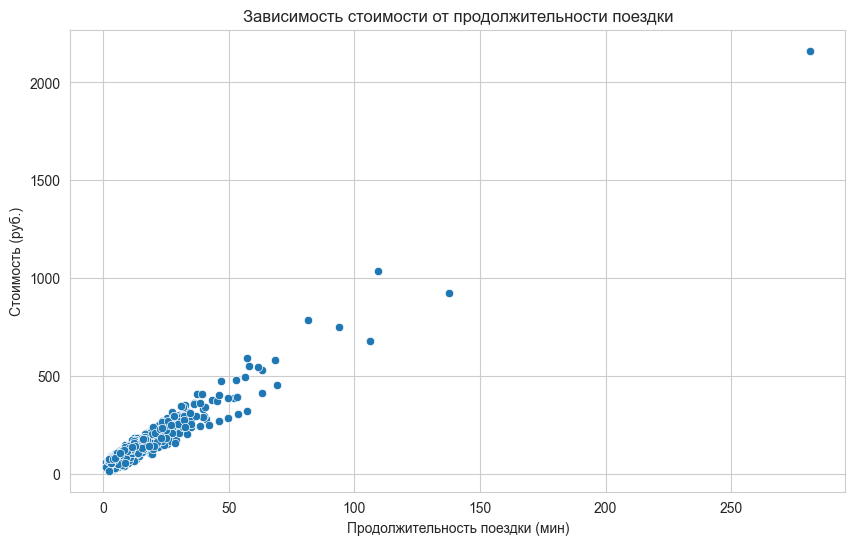

In [7]:
print("\nКорреляция между продолжительностью и стоимостью:")
print(df[['trip_duration_min', 'nominal_price_rub_amt']].corr())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration_min', y='nominal_price_rub_amt', data=df.sample(n=1000, random_state=1))
plt.title('Зависимость стоимости от продолжительности поездки')
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Стоимость (руб.)')
plt.show()

Вывод: Существует сильная положительная корреляция между продолжительностью поездки и её стоимостью. Это подтверждает, что тарификация сервиса преимущественно поминутная, и стоимость поездки напрямую зависит от времени её использования.

### Заключение и продуктовые гипотезы

На основе предоставленных нам данных можно выдвинуть **3 продуктовые гипотезы для роста**:

* **Гипотеза 1: Пакетные тарифы.** Предложение пакетов поездок (например, 10 поездок за фиксированную стоимость) увеличит частоту использования сервиса. **Эта гипотеза основана на выводе о том, что большинство поездок непродолжительны (15-20 минут).**

* **Гипотеза 2: Бонусы за поездки в низкий сезон.** Начисление бонусных баллов за поездки в будни поможет равномернее распределить нагрузку и увеличить доходность в часы спада. **Это решение вытекает из анализа распределения поездок по времени суток, который показал явный спад активности в дневные часы.**

* **Гипотеза 3: Оптимизация расположения самокатов.** Размещение самокатов вблизи бизнес-центров и университетов поможет привлечь клиентов для поездок по делам. **Данная гипотеза опирается на выводы о двух пиках активности в будние дни (утро и вечер), что характерно для транспортных маршрутов «дом-работа-дом».**

---

### Самая перспективная гипотеза

Самой перспективной является **гипотеза о пакетных тарифах**.

Эта гипотеза напрямую нацелена на **увеличение повторных поездок и удержание клиентов**. Её можно легко протестировать с помощью A/B-теста, разделив аудиторию на группы. В качестве **ключевых метрик** мы бы измеряли **среднее количество поездок на одного пользователя в неделю** и **средний доход с пользователя (ARPU)**. Если гипотеза окажется верной, это приведёт к **росту общей выручки** и формированию лояльной аудитории.